In [ ]:
# 구글 마운트 후
# 파일위치 지정
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 학습목표
- CNN 개념에 대해 알고 CNN 모델 알고리즘을 구성할 수 있다.
- CNN 모델과 MLP 모델을 비교하여 이미지 분류 성능 비교
- 개 고양이를 분류하는 이진분류 실습 (CNN알고리즘 활용)
- 모델의 성능을 높이는 다양한 방법을 시도
  - 성능 좋은 모델로 변경
  - 데이터 변경 -> 증식

In [ ]:
!pwd

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- npz : (numpy zip) numpy에서 제공하는 파일 형식 -> 여러개의 numpy 배열을 하나의 압축된 파일로 저장하게 도와줌
- 대용량의 데이터를 압축형태로 정리, 저장공간의 효율이 높아지며 공유가 빠름

In [ ]:
# 데이터 로딩하기
data = np.load('./data/np_cats_dogs.npz')
data

NpzFile './data/np_cats_dogs.npz' with keys: X_train, X_test, y_train, y_test

- 연결 안될때 구글 마운트 해제후, 다시 해주기!

In [ ]:
# 각 저장되어있는 데이터 변수에 저장
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2000, 224, 224, 3) (1000, 224, 224, 3) (2000,) (1000,)


- 학습용 데이터: 2000장, 평가용 데이터 1000장
- 문제데이터 -> 이미지의 크기 (224,224) 가로세로 224 픽셀, 3-> 색상차원 -> 컬러이미지(RGB)

array([[[105,  97,  86],
        [101,  93,  82],
        [114, 106,  95],
        ...,
        [243, 244, 239],
        [243, 244, 239],
        [242, 243, 238]],

       [[105,  97,  86],
        [101,  93,  82],
        [114, 106,  95],
        ...,
        [243, 244, 239],
        [243, 244, 239],
        [243, 244, 239]],

       [[105,  97,  86],
        [101,  93,  82],
        [114, 106,  95],
        ...,
        [243, 244, 239],
        [243, 244, 239],
        [243, 244, 239]],

       ...,

       [[ 74,  37,  12],
        [ 72,  35,   9],
        [ 71,  34,   7],
        ...,
        [220, 184,  43],
        [222, 186,  46],
        [221, 186,  45]],

       [[ 70,  33,   7],
        [ 75,  38,  11],
        [ 81,  44,  16],
        ...,
        [218, 182,  42],
        [218, 182,  42],
        [219, 183,  44]],

       [[ 68,  31,   4],
        [ 76,  39,  12],
        [ 85,  48,  21],
        ...,
        [217, 181,  41],
        [215, 179,  39],
        [217, 181,  43]]], dtype=uint8)
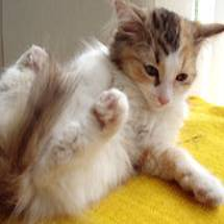

In [ ]:
# X_train 출력
X_train[8]   # 8

### MLP 모델링

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 최적화 함수 클래스 불러와서 사용
from tensorflow.keras.callbacks import EarlyStopping

# 신경망 모델 설계
mlp_model = Sequential()
mlp_model.add(InputLayer(shape=(224,224,3)))
mlp_model.add(Flatten())
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dense(64, activation='relu'))

mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
mlp_model.fit(X_train, y_train, epochs=40, validation_split=0.2, callbacks=[es])

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5128 - loss: 2997.6382 - val_accuracy: 0.0000e+00 - val_loss: 3976.4153
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5233 - loss: 1649.3429 - val_accuracy: 0.0000e+00 - val_loss: 2640.6365
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5850 - loss: 523.6149 - val_accuracy: 0.9450 - val_loss: 10.1676
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5797 - loss: 184.9913 - val_accuracy: 0.0700 - val_loss: 454.0602
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5350 - loss: 477.2444 - val_accuracy: 0.1525 - val_loss: 273.7897
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5955 - loss: 200.1397 - val_accuracy: 0.0000e+00 - val_loss: 596.0999
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6482 - loss: 71.4094 - val_accuracy: 0.8575 - val_loss: 8.2217
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6028 -

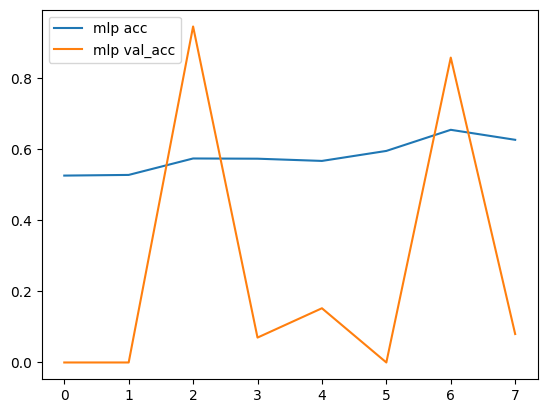

In [ ]:
# mlp 모델링 결과 시각화 (acc, val_acc)
plt.plot(mlp_model.history.history['accuracy'], label='mlp acc')
plt.plot(mlp_model.history.history['val_accuracy'], label='mlp val_acc')
plt.legend()
plt.show()
# 개고양이 사진을 학습중 -> 불안정한 학습중임을 확인 (mlp 모델)

### CNN (Convoluational Neural Network, 합성곱 신경망) 모델링
- 주로 이미지데이터 분석시 사용
- 데이터의 특징을 추출하여 학습에 활용 (공간적인 구조를 가진 데이터 분석)
- 층 구성
  - 특성추출부
    - Conv (합성곱) : 이미지의 특성 추출
    - Pooling (풀링): 특성이 아닌 부분을 제거(크기를 줄여 연산량 감소)
  - 분석부
    - Dense : 추출한 특징을 받아 연산을 통해 클래스 확률 계산

- cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu', padding='same', strides=(2,2)))
  - fillters : 필터의 수
  - kernel_size: 필터 사이즈(행, 열)
  - input_shape: 입력 데이터의 형태(행, 열, 색상차원)
  - activation: 활성화 함수-> 비선형성을 추가하여 더 복잡한 연선을 진행
  - padding: 데이터 경계처리방법 정의
    - valid: 유효한 영역만 출력
    - same: 출력 데이터의 크기를 입력 데이터의 사이즈와 동일하도록 설정 -> 테두리 0 값을 둘러서 연산
  - strides: 커널을 이동시키는 보폭
    - (행,열)
<br><br>
- stride와 kernel의 크기에 따라서 결과가 달라짐

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # 2차원
# Conv2D : 이미지의 특성 추출
# MaxPooling2D : 다운샘플링 -> 연산량 감소, 중요한 정보만 추출
# 딥러닝 신경망 모델 설계
cnn_model = Sequential()
# 특성 추출부
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
# 32개의 필터(특징을 추출할 수 있도록 도와줌), 3,3 크기의 필터
# 필터는 자동으로 결정이 됨
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Flatten())
# 분석부
cnn_model.add(Dense(512, activation='relu'))
# 출력층 -> 이진분류
cnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 학습방법 및 평가방법 설정
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
cnn_model.fit(X_train, y_train, epochs=40, validation_split=0.2, callbacks=[es])

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.5440 - loss: 971.5825 - val_accuracy: 0.4000 - val_loss: 1.1114
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7681 - loss: 0.5211 - val_accuracy: 0.4650 - val_loss: 1.1829
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9460 - loss: 0.2407 - val_accuracy: 0.4050 - val_loss: 2.1750
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9853 - loss: 0.0775 - val_accuracy: 0.3850 - val_loss: 2.9836
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9981 - loss: 0.0199 - val_accuracy: 0.3500 - val_loss: 4.1221
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9989 - loss: 0.0059 - val_accuracy: 0.3500 - val_loss: 5.0340
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9984 - loss: 0.0029 - val_accuracy: 0.3850 - val_loss: 5.0088
Epoch 7: early stopping


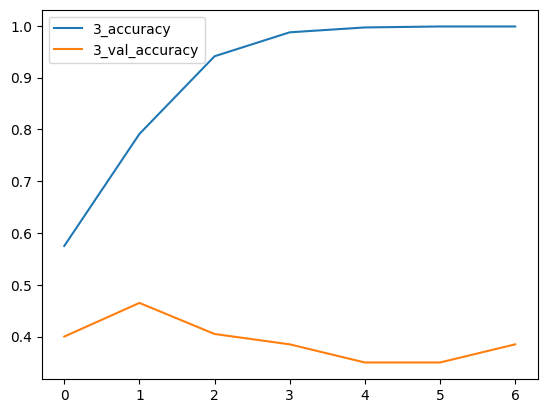

In [ ]:
plt.plot(cnn_model.history.history['accuracy'], label='3_accuracy')
plt.plot(cnn_model.history.history['val_accuracy'], label='3_val_accuracy')
plt.legend()
plt.show()
# mlp 모델에 비해 안정된 학습을 하고 있으나
# train 결과는 좋으나 검증 데이터에 대한 정확도가 떨어지는 것을 확인
# 과대적합의 가능성 확인 -> 과대적합을 해소하면서 모델의 일반화 성능을 높여보자!

- train 정확도는 상승하고 있지만, test 정확도는 낮다
- mlp보다 CNN이 훨씬 더 수치가 좋다



---



### 이미지 데이터 증식을 통한 CNN 모델 성능 개선
- 이미지증식 (Image Augmentation) 결과로 생성되는 데이터의 갯수는 증식과정과 학습설정에 따라 다름
- 한 개의 이미지를 다양한 형태로 변경하여 데이터를 늘려나감
  - 확대, 축소, 회전, 반전

| **매개변수**          | **설명**                                                                 |
|-----------------------|-------------------------------------------------------------------------|
| `rescale`             | 픽셀 값을 스케일링 (예: `rescale=1./255`로 0~1로 정규화).               |
| `rotation_range`      | 이미지를 일정 각도로 회전 (0~360도).                                    |
| `width_shift_range`   | 이미지를 가로 방향으로 이동 (비율).                                     |
| `height_shift_range`  | 이미지를 세로 방향으로 이동 (비율).                                     |
| `shear_range`         | 이미지를 전단(비틀기).                                                  |
| `zoom_range`          | 이미지를 확대/축소.                                                    |
| `horizontal_flip`     | 이미지를 좌우 반전.                                                    |
| `vertical_flip`       | 이미지를 상하 반전.                                                    |
| `fill_mode`           | 변형 시 생기는 빈 공간을 채우는 방식 (`nearest`, `constant`, `reflect`, `wrap`). |

In [ ]:
# 이미지 압축파일 해제
from zipfile import ZipFile # 코드로 압출파일 해제
import os # 파일관리
!pwd

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


In [ ]:
# 압축해제할 데이터 위치
zip_path = './data/cats_and_dogs_filtered.zip'
# 압축해제
with ZipFile(zip_path, 'r') as f:
  f.extractall('./data/') # 압출해제 후 저장위치 작성

In [ ]:
!ls ./data/cats_and_dogs_filtered

test  train


In [ ]:
# 이미지 증식 도구 불러오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 증식할 이미지 데이터 경로 설정
train_dir = 'data/cats_and_dogs_filtered/train/'
test_dir = 'data/cats_and_dogs_filtered/test/'
# 이미지 변형 형식 지정 (객체 생성)
train_gen = ImageDataGenerator(rescale = 1./255, # 픽셀값을 0~1 값으로 정규화
                               zoom_range = 0.2, # 20% 까지 확대,축소 -> 이미지의 다양성 높임
                               horizontal_flip = True,
                               rotation_range = 20) # 20도까지 회전
# test 데이터의 분산만 맞춰주기 (test는 증식 필요없지만)
test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# train, test 데이터와 연결하여 이미지 증식
train_generator = train_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=20, class_mode='binary') # 개고양이 이진분류
test_generator = test_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=20, class_mode='binary') # 개고양이 이진분류

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 모델링 과정에서 과적합 제어 후 이미지증식 데이터로 학습
- Dropout : 딥러닝 모델링에서 과적합을 방지하기 위해 사용하는 기술
- 학습중에 모든 뉴런을 사용하지 않고, 일부를 무작위로 비활성화 -> 과대적합을 제어
  - model.add(Dropout(0.2))
  - 20% 뉴런을 제외하고 학습 진행
  - 분석부에서 사용됨

In [ ]:
# 라이브러리 불러오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 모델설계
cnn_model2 = Sequential()
# 특성 추출부
cnn_model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
cnn_model2.add(MaxPooling2D())
cnn_model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model2.add(MaxPooling2D())
# 1차원으로 변경
cnn_model2.add(Flatten())
# 분석부
cnn_model2.add(Dense(512, activation='relu'))
# dropout: 모델의 일반화 성능을 높이고자 사용 -> 20%의 뉴런을 제외하고 학습
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델학습 -> 증식을 진행한 데이터로 학습
cnn_model2.fit(train_generator, validation_data=test_generator, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - accuracy: 0.4870 - loss: 2.5687 - val_accuracy: 0.5930 - val_loss: 0.6708
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.5960 - loss: 0.6726 - val_accuracy: 0.5920 - val_loss: 0.6798
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 339ms/step - accuracy: 0.6033 - loss: 0.6809 - val_accuracy: 0.5920 - val_loss: 0.6653
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 336ms/step - accuracy: 0.6001 - loss: 0.6513 - val_accuracy: 0.6140 - val_loss: 0.6524
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - accuracy: 0.6338 - loss: 0.6455 - val_accuracy: 0.6580 - val_loss: 0.6502
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.6681 - loss: 0.6364 - val_accuracy: 0.6330 - val_loss: 0.6317
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 344ms/step - accuracy: 0.6812 - loss: 0.5982 - val_accuracy: 0.6290 - val_loss: 0.6603
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - accuracy: 0.6893 - loss: 0

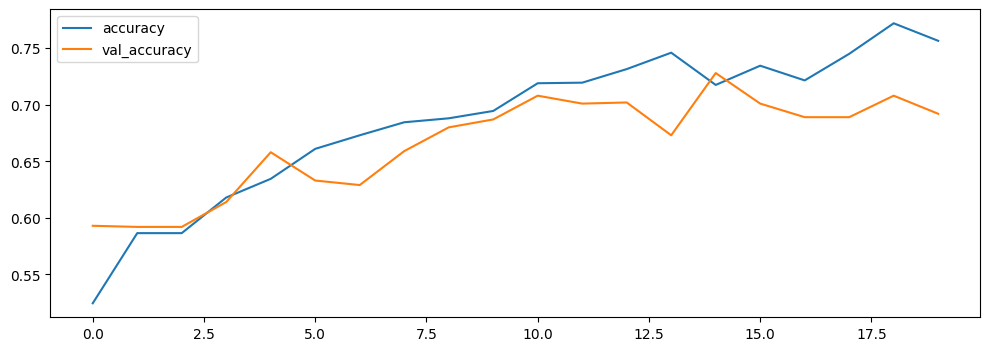

In [ ]:
# cnn_model2 acc, val_acc
plt.figure(figsize=(12,4))
plt.plot(cnn_model2.history.history['accuracy'], label='accuracy')
plt.plot(cnn_model2.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

##### 정리
- 이미지 증식, Dropout 등의 방식을 활용하여 일반화된 모델을 생성할 수 있다.
- 이미지 증식을 통한 모델의 성능개선 -> 이미지 증식의 단점으로는 시간이 오래 소요됨
- 자체적으로 설계한 모델은 여러번의 학습을 통해 검증을 진행해야 한다
  - 속성들, padding, 커널의 수, 커널의 크기, stride 등등의 값을 조절해가변서 검증을 진행해야 함
  - 수정과 보완의 시간이 오래걸림



---



### 전이학습
- 기존에 학습된 모델을 가져다가 사용
  - 우리만의 모델로 재학습시켜 사용
- 장점
  - 적은 데이터로도 좋은 성능
  - 학습이 빠르게 진행됨(추가 데이터만 학습)
  - 학습할 데이터셋의 초기특징을 추출하는 학습시간이 줄어듦
- 주의
  - 우리가 분류하고자 하는 완전히 똑같은 데이터로 학습한 모델이 아닐 수 있음 -> 비슷한 분류문제를 학습한 모델을 재설계하여 사용
  - 분류대상은 다르나 판단기준이 비슷한 모델을 가져다 재학습하여 사용

- (예
  - 우리의 목표: 개 vs 고양이 분류
  - 사전학습된 모델: 사자 vs 호람이 (0), 승용차 vs 트럭 (X)

### VGG16 모델
- CNN 구조, 이미지 분류용 신경망 모델
- imagenet 데이터셋 1000개 카테고리로 훈련된 모델 (객체, 동물, 나무, 음식 등등)

In [ ]:
# VGG16 모델 불러오기
from tensorflow.keras.applications import VGG16

In [ ]:
# 사전학습된 모델 불러와서 사용하기
# 사전학습된 모델에 새롭게 연결해서 학습 -> 전이학습
# 모델의 특성 추출부만 불러오기
# include_top: 분류층을 포함할지 여부 -> vgg16 1000개 클래스 분류하는 다중분류모델 # weights: 이미지넷 데이터로 학습한 가중치를 가지는 모델을 사용
vgg16 = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 미세조정방식(fine tuning) 설정 -> 동결
# 학습시 가중치가 갱신되는 것을 막음 -> 재학습시 가중치가 갱신되면 성능을 떨어뜨리게 됨
vgg16.trainable = False # train 학습 할 때 가중치 동결

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 모델설계
# VGG16 모델의 특성추출기로 사용, 이진분류를 위해 우리의 분류기를 추가
transfer_model = Sequential()
transfer_model.add(InputLayer(input_shape=(224,224,3)))
transfer_model.add(vgg16) # 사전학습된 모델을 특성추출부에 추가
transfer_model.add(Flatten())
transfer_model.add(Dense(64, activation='relu'))    # 분석부
transfer_model.add(Dense(1, activation='sigmoid'))  # 출력부
# 학습 방법 및 평가방법 설정
transfer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
transfer_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,320,449 (62.26 MB)

 Trainable params: 1,605,761 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# 미세조정 (fine_tunning) -> 사전학습된 모델을 재학습하여 나의 새로운 데이터에 잘 작동하게끔 세밀 조정
vgg16.summary()
# 마지막에 있는 합성곱 층만을 가져와 우리 데이터로 재학습 (block5_conv3) -> 개고양이데이터로 재학습

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
vgg16.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
for layer in vgg16.layers: # vgg16 모든 층 검색
  if layer.name == 'block5_conv3':
    layer.trainable = True # 학습시 가중치 업데이트
  else:
    layer.trainable = False # 나머지 층 동결

In [ ]:
# 학습
transfer_model.fit(X_train,y_train,validation_split=0.2, epochs=10) # 본래 데이터/증식안된 이미지들

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 425ms/step - accuracy: 0.8102 - loss: 5.8173 - val_accuracy: 0.8350 - val_loss: 0.1971
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.9785 - loss: 0.0616 - val_accuracy: 0.9175 - val_loss: 0.3083
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.9855 - loss: 0.0407 - val_accuracy: 0.9750 - val_loss: 0.0692
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.9950 - loss: 0.0096 - val_accuracy: 0.9400 - val_loss: 0.3854
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9650 - val_loss: 0.1838
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.9917 - loss: 0.0476 - val_accuracy: 0.9475 - val_loss: 0.2255
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9875 - val_loss: 0.0829
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.9930 - loss: 0.0129 - val_accu

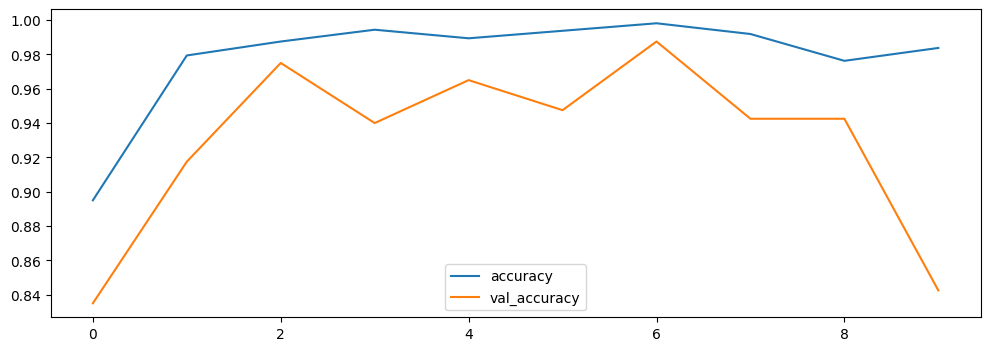

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(transfer_model.history.history['accuracy'], label='accuracy')
plt.plot(transfer_model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
transfer_model.fit(train_generator, validation_data=test_generator, epochs=10) # 증식된 이미지들

Epoch 1/10
 99/100 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7181 - loss: 0.5024 

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  OSError: [Errno 5] Input/output error
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
                                    ^^^^^^^^

OSError: [Errno 5] Input/output error


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  OSError: [Errno 5] Input/output error
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
                                    ^^^^^^^^

OSError: [Errno 5] Input/output error


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_12764]

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(transfer_model.history.history['accuracy'], label='accuracy')
plt.plot(transfer_model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

##### 결과
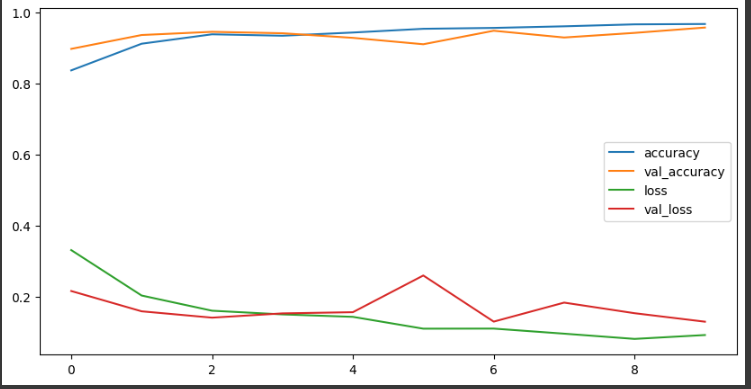
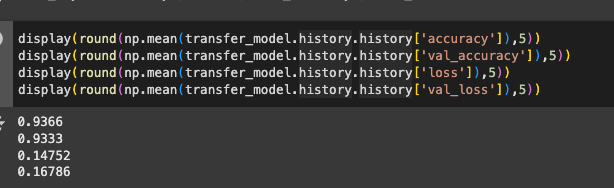

==> 증식된 이미지로 다시 학습시키니 확실히 결과가 좋아졌다!